<a href="https://colab.research.google.com/github/Nicole-Wanjiru/TimeSeriesSupermarketSalesAnalysis/blob/main/TimeSeriesSupermarketSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Data: Exploratory Data Analysis Project With Time Series

<img src = "https://lh3.googleusercontent.com/drive-storage/AJQWtBM0ErDNwIJbtVf-DYceHlwJPC8v2z4w4U8Uoq83_aBryjfomSwZ-tTo0sANWNV1bXdReCG9vn6sXESJJmlAEGs4C2NrwpTojkggyg_-WX-nHG0=w105-h70-c" width = "120">

## Overview
A supermarket chain is looking to expand their business. The company leadership team has provided the data team with historical supermarket sales data. Leadership is interested in finding answers to several questions:


1.   What is the average purchase total of a customer's cart?
2.   What was the average overall customer rating?
3.   How do customer ratings compare at each of our 3 branch locations?
4.   Which branch location is most profitable?
5.   Do members tend to spend more m
5.   Do members tend to spend more money than non-members?
6.   What is our best selling product line?
7.   How do sales fluctuate during the week? Which day of the week is most profitable?





In [91]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
#Reading The Dataset
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [93]:
#Checking for empties:
#The data set has a total of 1000 sales records with no empty record to be filed or removed.

df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [94]:
#Date column analysis - Time series analysis
df['Date']

,Date
0,1/5/2019
1,3/8/2019
2,3/3/2019
3,1/27/2019
4,2/8/2019
...,...
995,1/29/2019
996,3/2/2019
997,2/9/2019
998,2/22/2019


The Date column is currently storing the date of transactions as string objects. Converting the dates from string objects to datetime objects will allow us to more easily sort and filter transactions by date, perform time series analysis, and visualize sales metrics over time.

In [95]:
df['Date'] = pd.to_datetime(df['Date'])
# Examine the Data to Check Successful Date Conversion
df['Date']

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


In [96]:
#Use the date as the index
df.set_index('Date', inplace = True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7


In [97]:
#Sort the date from the earliest to the latest
df.sort_index(inplace=True)

In [98]:
#Examine the data
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7


The previous index column has been successfully replaced by the Date column. We see that there are now 16 columns instead of the original 17. The dates are also correctly sorted from 2019-01-01 to 2019-03-30.

In [99]:
df['day_of_week'] = df.index.day_of_week
df.groupby('day_of_week').size()

,0
day_of_week,
0,125
1,158
2,143
3,138
4,139
5,164
6,133


In [100]:
#Label and COde days of the week from representation of categorical representation
# we can use both in place () or map()
df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['day_of_week']
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_of_week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7,Saturday


1. Determine the number of transactions that occured on every branch i.e A, B, C

In [101]:
df.groupby('Branch').size()

,0
Branch,
A,340
B,332
C,328


2. Transactions per city


In [102]:
df.groupby('City').size()

,0
City,
Mandalay,332
Naypyitaw,328
Yangon,340


Branch A is located in Yangon and had a total of 340 transactions.
Branch B is located in Mandalay and had a total of 332 transactions.
Branch C is located in Naypyitaw and had a total of 328 transactions.

Calculate Statistical Summary about the Dataset

In [103]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Observations:
1. The average customer rating was 6.97, minimum ratng was 4, maximum rating was 10.
2. The maximum quantity was 10 and the minimum quantity was 1.


##DATA CLEANING

In [104]:
#Check and remove any duplicated records
df.duplicated().sum()

0

In [105]:
#Removing unuseful columns
#gross margin percentage	gross income
df.drop(columns=['gross margin percentage', 'gross income'], inplace=True)
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


In [106]:
# Rename the cogs(cost of goods) to Pre-tax Total, Which represented the price of Commonity Before the Tax Deducation.
df.rename(columns={'cogs': 'Pre-tax Total'},inplace = True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax Total,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


In [107]:
# Payment Column Analysis
#Rename the value Ewallet to E-Wallet
#replace()
df.groupby('Payment').size()


,0
Payment,
Cash,344
Credit card,311
Ewallet,345


In [108]:
df['Payment'] = df['Payment'].replace('Ewallet', 'E-Wallet')
df.groupby('Payment').size()

,0
Payment,
Cash,344
Credit card,311
E-Wallet,345


## DATA ANALYSIS:
1. What is the overall customer rating for the supermarket company.

Let's start by looking at the frequency for different customer ratings. We'll create a histogram for ratings across all 3 branches of the supermarket.

<Axes: xlabel='Rating', ylabel='Count'>

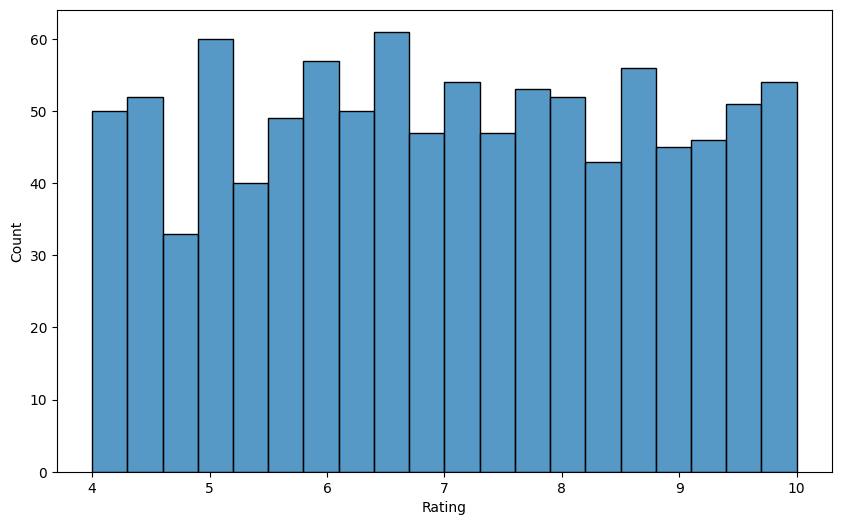

In [109]:
#Visualize the customer rating using a Histplot.
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'Rating', bins = 20)


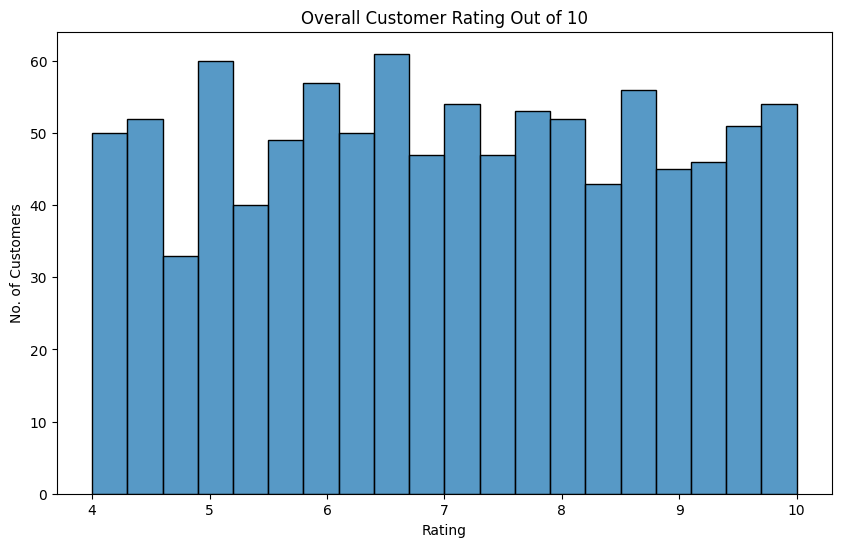

In [110]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'Rating', bins = 20)
plt.title('Overall Customer Rating Out of 10')
plt.xlabel('Rating')
plt.ylabel('No. of Customers')
plt.show()


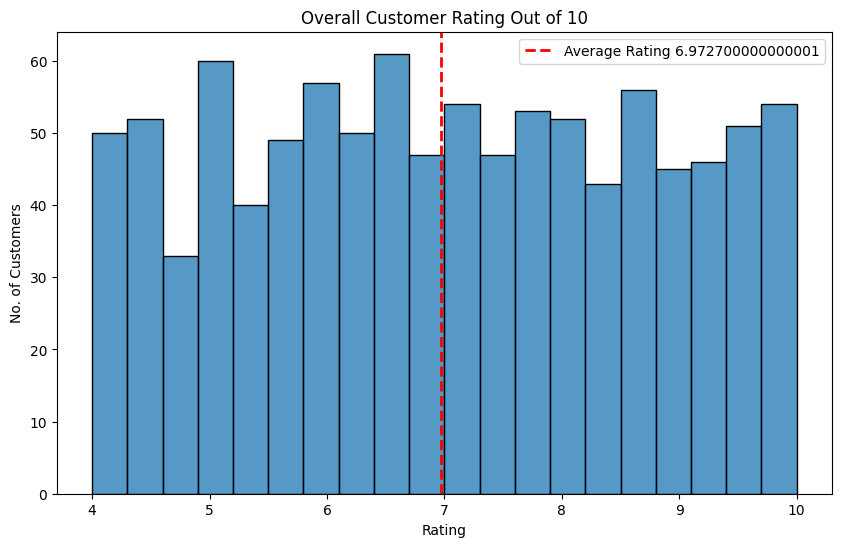

In [111]:
# Visualize the customer rating a histplot.
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Rating', bins = 20)

plt.title('Overall Customer Rating Out of 10')
plt.xlabel('Rating')
plt.ylabel('No. of Customers')


# Add the Average rating as a vertical dashed lineon the histogram.
average_rating = df['Rating'].mean()

plt.axvline(average_rating, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.legend([f'Average Rating {average_rating}'])

plt.show()

# How do customer ratings compare across the 3 supermarket branches?

Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction? Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch B is in Naypyitaw.

<Axes: xlabel='Rating', ylabel='Count'>

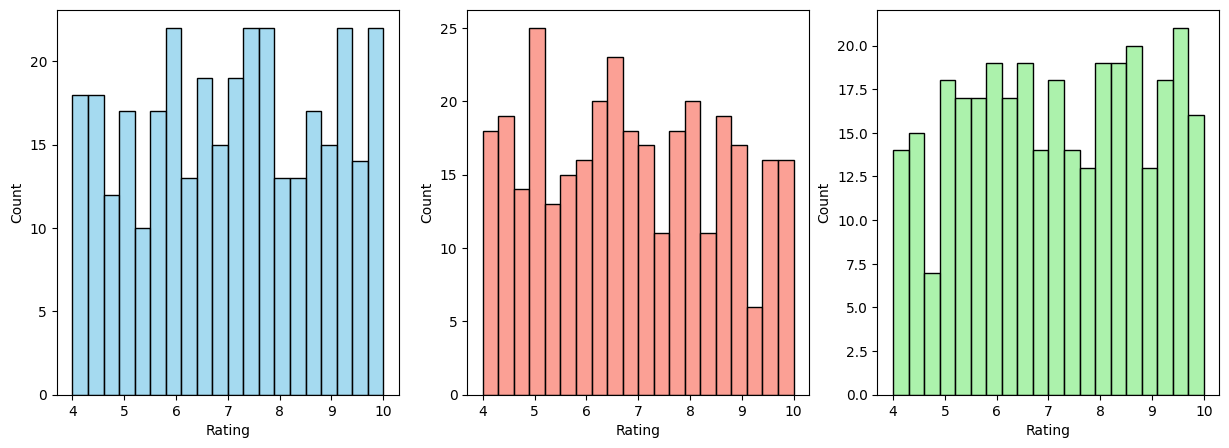

In [112]:
# Create Subsets where we filter each transaction based on the City.
yangon_df = df[df['City']=='Yangon']
mandalay_df = df[df['City']=='Mandalay']
naypyitawy_df = df[df['City']=='Naypyitaw']

#Set up 3 Histograms side by side for the 3 supermarket branches:

fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

sns.histplot(data=yangon_df, x='Rating', bins=20, color = 'skyblue', ax = axis [0])
sns.histplot(data=mandalay_df, x='Rating', bins=20, color = 'salmon', ax = axis [1])
sns.histplot(data=naypyitawy_df, x='Rating', bins=20, color = 'lightgreen', ax = axis [2])

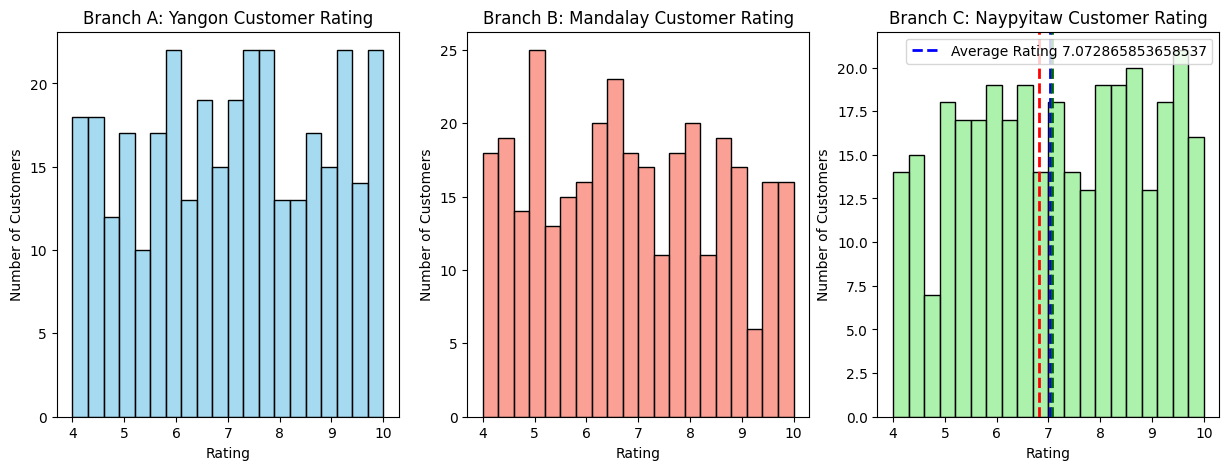

In [113]:
# Create Subsets where we filter each transaction based on the City.
yangon_df = df[df['City']=='Yangon']
mandalay_df = df[df['City']=='Mandalay']
naypyitawy_df = df[df['City']=='Naypyitaw']


#Set up 3 Histograms side by side for the 3 supermarket branches:

fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

# Plot the distribution of ratings for each branch

sns.histplot(data=yangon_df, x='Rating', bins=20, color = 'skyblue', ax = axis[0])
sns.histplot(data=mandalay_df, x='Rating', bins=20, color = 'salmon', ax = axis[1])
sns.histplot(data=naypyitawy_df, x='Rating', bins=20, color = 'lightgreen', ax = axis[2])

# Set the titles for each subplot

axis[0].set_title('Branch A: Yangon Customer Rating')
axis[1].set_title('Branch B: Mandalay Customer Rating')
axis[2].set_title('Branch C: Naypyitaw Customer Rating')

#Set the label as Rating

axis[0].set_xlabel('Rating')
axis[1].set_xlabel('Rating')
axis[2].set_xlabel('Rating')

#Set the y label as the number of customers

axis[0].set_ylabel('Number of Customers')
axis[1].set_ylabel('Number of Customers')
axis[2].set_ylabel('Number of Customers')

#Set the average rating for the 3 histograms on dashed line

yangon_average_rating = yangon_df['Rating'].mean()
mandalay_average_rating = mandalay_df['Rating'].mean()
naypyitaw_average_rating = naypyitawy_df['Rating'].mean()

# draw the avxline for the 3 histograms
# Yangon
plt.axvline(yangon_average_rating, color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.legend([f'Average Rating {yangon_average_rating}'])

# draw the avxline for the 3 histograms
# Mandalay
plt.axvline(mandalay_average_rating, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.legend([f'Average Rating {mandalay_average_rating}'])
# draw the avxline for the 3 histograms
# Naypyitaw
plt.axvline(naypyitaw_average_rating, color = 'darkgreen', linestyle = 'dashed', linewidth = 2)
plt.legend([f'Average Rating {naypyitaw_average_rating}'])


The rating distributions are relatively similar across all three supermarket branches in different cities
The difference in average ratings between supermarket branches is relatively small.
The highest rating was 7.07 / 10 in Naypyitaw.

# What percentage of transactions were made using a member's card?

The quetion can be answered using a pie chart by showing the ration of the transaction for card and

<Axes: >

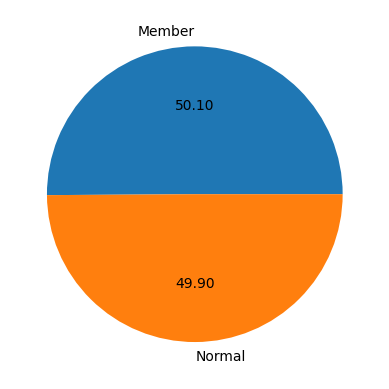

In [114]:
df.groupby('Customer type').size().plot(kind='pie', autopct='%.2f')

1. There is a roughly even split of transactions involving a member's card versus those which did not.
2. 50.1% of transactions used a member's card and 49.9% did not.

# Which product lines drove the highest sales? Which were the most common?

Now we can turn our attention to product lines. If a particular product line is a significant driver of sales, the company can consider investing more into that product line. The company can also address lower performing product lines.

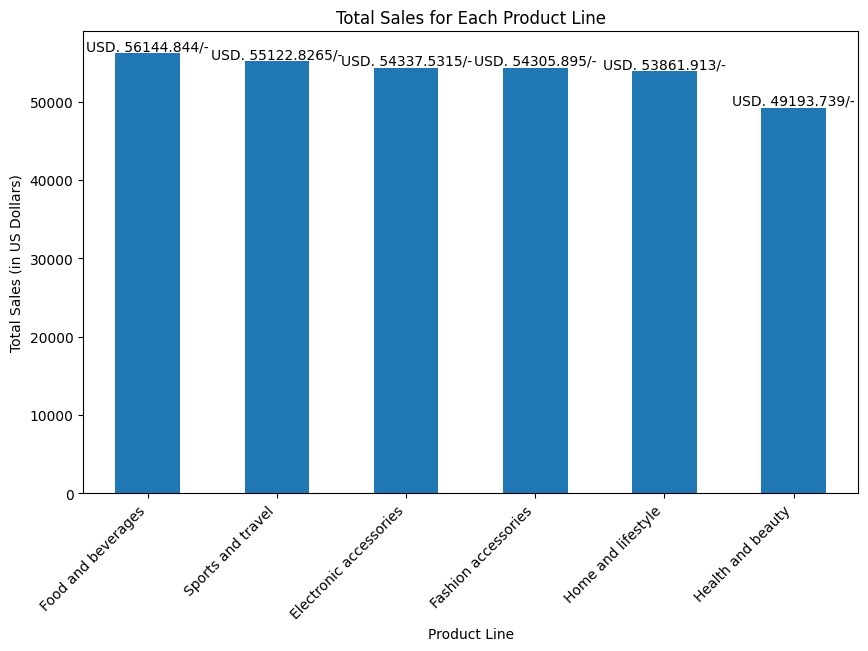

In [115]:
# create a dataframe where the Total Revenue are grouped according to the Product Line.

product_line_totals = df.groupby('Product line').sum('Total')


# Create another dataframe where we are ordering from the highest total revenue to the lowest total revenue

product_line_totals = product_line_totals.sort_values(by='Total', ascending = False)
product_line_totals

#visualize the product line totals
plt.figure(figsize=(10,6))
ax = product_line_totals['Total'].plot(kind='bar')

#Add axis labels and titles
plt.title('Total Sales for Each Product Line')
plt.xlabel('Product Line')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in US Dollars)')

plt.show

#Add the labbels for the maximum values and the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')


* Food and Beverages" was the top selling product line with USD 56144.844/- in sales.
* The next few product lines of "sports and travel", "electronic accessories", "fashion accessories", and "Home and lifestyle" had similar total sales.
* Health and Beauty" was the lowest selling product line with Ks. 49193.739/- in sales.

# How did product lines perform among different gender categories?

Lets start by Examining the gender categories in the supermarket

In [116]:
df.head(3)
df.groupby('Gender').size()

,0
Gender,
Female,501
Male,499


The dataset contains 501 transactions made by females and 499 made by males.
Lets compare product popularity between males and females.


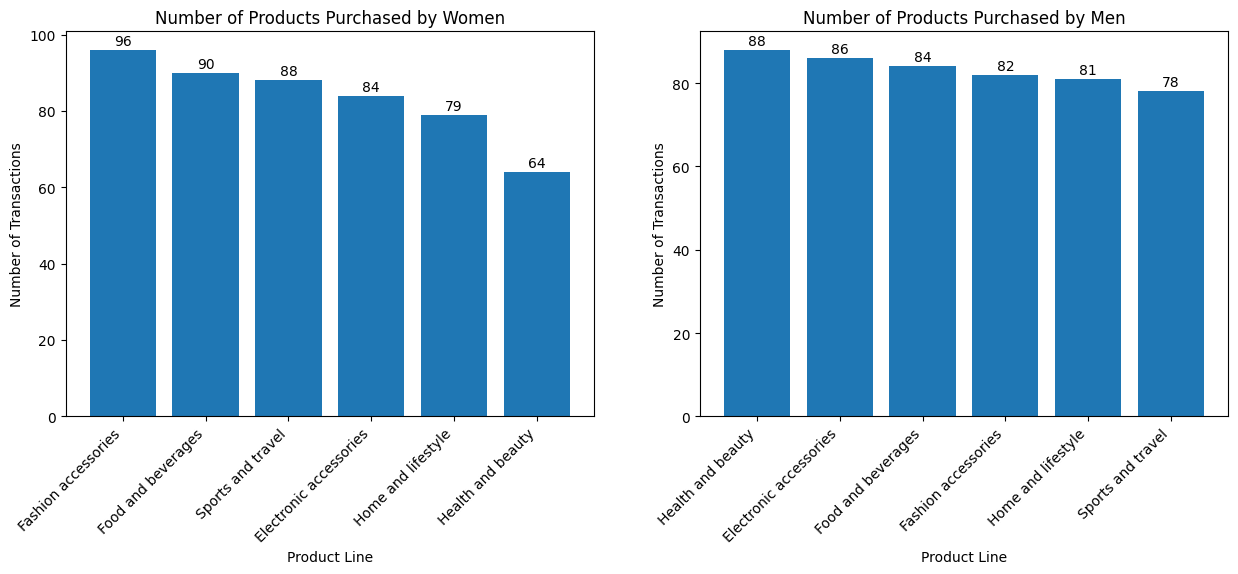

In [123]:
# Create two Dataframes  that separates males from female transactions
women_df = df[df['Gender'] == 'Female']
men_df = df[df['Gender'] == 'Male']

# Also, lets separate product lines bought by men and women

women_product_line_count = women_df['Product line'].value_counts()
men_product_line_count = men_df['Product line'].value_counts()

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

#Women purchases at axis 0
# index->product lines
#count ->
#a) women purchases axis 0
axes[0].bar(women_product_line_count.index, women_product_line_count.values)
axes[0].set_title('Number of Products Purchased by Women')
axes[0].set_xlabel('Product Line')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Number of Transactions')


# b) men purchases at axis 1
axes[1].bar(men_product_line_count.index, men_product_line_count.values)
axes[1].set_title('Number of Products Purchased by Men')
axes[1].set_xlabel('Product Line')
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Number of Transactions')

# Add total number of transaction labels for second bar chart
#a)women
for bar in axes[0].patches:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')

#b)men
for bar in axes[1].patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')


* Women and men were represented equally in the dataset
* "Fashion accessories" were the most popular with women with 96 transactions. It was 4th popular for men with 82 transactions.
* The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.
* The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.


## How did the sales data fluctuate over time?

We can start by grouping the data according to